In [2]:
#Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
import pytesseract

In [4]:
def GetLetter(croppedLetter):
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    p1 = fig.add_subplot(2, 5, 3)
    imgplot = plt.imshow(imBlur, cmap='gray')
        
    
    return cardType

def suitComparison(club, diamond, heart, spade, inputTestImage):
    # Variables for comparison
    best_rank_match_diff = 1000000000
    match = "none"
    
    # Performs comparison with heart.
    height, width, _ = heart.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, heart)
    rank_diff = int(np.sum(diff_img)/255)               
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "heart"


    # Performs comparison with spade.
    height, width, _ = spade.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, spade)
    rank_diff = int(np.sum(diff_img)/255)           
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "spade"


    # Performs comparison with club.
    height, width, _ = club.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, club)
    rank_diff = int(np.sum(diff_img)/255)             
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "club"


    # Performs comparison with diamond.
    height, width, _ = diamond.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, diamond)
    rank_diff = int(np.sum(diff_img)/255)      
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "diamond"


    p1 = fig.add_subplot(2, 5, 4)
    imgplot = plt.imshow(inputTestImage, cmap='gray')
    
    # Prints the match with the lowest absdiff
    return match

img = cv2.imread("blackCard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

#inverse = cv2.bitwise_not(B)
C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(C, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i = 0

while i < 5:
    fig = plt.figure()#make a figure to show things on
    
    largestContour = C[i]
    x,y,w,h = cv2.boundingRect(largestContour)

    ROI = img[y:y+h,x:x+w]
    H,W,Channels = ROI.shape

    cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
    cropped_symbol = ROI[50:int(H * 0.3), 3:int(W * 0.2)]
    
    cardLetter = GetLetter(cropped_letter)
    
    # Reading in suit templates
    club = cv2.imread("clubs.png")
    diamond = cv2.imread("diamonds.png")
    heart = cv2.imread("hearts.png")
    spade = cv2.imread("spades.png")
    # Reading in template
    inputTestImage = cv2.imread("testSuit.jpg")
    
    bestMatch = suitComparison(club, diamond, heart, spade, cropped_symbol)
    print("The most likely suit match is:", bestMatch)
    
    print("The card is: ",cardLetter)
    
    p1 = fig.add_subplot(2, 5, 1)#nrows, ncols, index#span with (3, 1, (1, 2))
    imgplot = plt.imshow(ROI, cmap='gray')
    p1 = fig.add_subplot(2, 5, 2)
    imgplot = plt.imshow(cropped_letter, cmap='gray')
    p1 = fig.add_subplot(2, 5, 5)#nrows, ncols, index#span with (3, 1, (1, 2))
    imgplot = plt.imshow(img, cmap='gray')
    #p1 = fig.add_subplot(2, 5, 5)
    #imgplot = plt.imshow(cropped_letter, cmap='gray')
    plt.show()

    i = i + 1





TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

<Figure size 432x288 with 0 Axes>

In [1]:
def GetLetter(croppedLetter,fig):
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    p1 = fig.add_subplot(2, 5, 3)
    imgplot = plt.imshow(imBlur, cmap='gray')
        
    
    return cardType

def suitComparison(club, diamond, heart, spade, inputTestImage,fig):
    # Variables for comparison
    best_rank_match_diff = 1000000000
    match = "none"
    
    # Performs comparison with heart.
    height, width, _ = heart.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, heart)
    rank_diff = int(np.sum(diff_img)/255)               
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "heart"


    # Performs comparison with spade.
    height, width, _ = spade.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, spade)
    rank_diff = int(np.sum(diff_img)/255)           
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "spade"


    # Performs comparison with club.
    height, width, _ = club.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, club)
    rank_diff = int(np.sum(diff_img)/255)             
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "club"


    # Performs comparison with diamond.
    height, width, _ = diamond.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, diamond)
    rank_diff = int(np.sum(diff_img)/255)      
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "diamond"


    p1 = fig.add_subplot(2, 5, 4)
    imgplot = plt.imshow(inputTestImage, cmap='gray')
    
    # Prints the match with the lowest absdiff
    return match

def readCard(img):
    G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    T = 120
    T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

    #inverse = cv2.bitwise_not(B)
    C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    C = sorted(C, key=cv2.contourArea, reverse=True)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    i = 0

    while i < 5:
        fig = plt.figure()#make a figure to show things on

        largestContour = C[i]
        x,y,w,h = cv2.boundingRect(largestContour)

        ROI = img[y:y+h,x:x+w]
        H,W,Channels = ROI.shape

        cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
        cropped_symbol = ROI[50:int(H * 0.3), 3:int(W * 0.2)]

        cardLetter = GetLetter(cropped_letter,fig )

        # Reading in suit templates
        club = cv2.imread("clubs.png")
        diamond = cv2.imread("diamonds.png")
        heart = cv2.imread("hearts.png")
        spade = cv2.imread("spades.png")
        # Reading in template
        inputTestImage = cv2.imread("testSuit.jpg")

        bestMatch = suitComparison(club, diamond, heart, spade, cropped_symbol,fig)
        print("The most likely suit match is:", bestMatch)

        print("The card is: ",cardLetter)

        p1 = fig.add_subplot(2, 5, 1)#nrows, ncols, index#span with (3, 1, (1, 2))
        imgplot = plt.imshow(ROI, cmap='gray')
        p1 = fig.add_subplot(2, 5, 2)
        imgplot = plt.imshow(cropped_letter, cmap='gray')
        p1 = fig.add_subplot(2, 5, 5)#nrows, ncols, index#span with (3, 1, (1, 2))
        imgplot = plt.imshow(img, cmap='gray')
        #p1 = fig.add_subplot(2, 5, 5)
        #imgplot = plt.imshow(cropped_letter, cmap='gray')
        plt.show()

        i = i + 1

inputImg = cv2.imread("blackCard1.jpg")
readCard(inputImg)



NameError: name 'cv2' is not defined

In [5]:
def GetLetter(croppedLetter):
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    
    return cardType



img = cv2.imread("blackcard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

#inverse = cv2.bitwise_not(B)
C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(C, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i = 0

while i < 5:
    largestContour = C[i]
    x,y,w,h = cv2.boundingRect(largestContour)

    ROI = img[y:y+h,x:x+w]
    H,W,Channels = ROI.shape

    cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
    
    cardLetter = GetLetter(cropped_letter)
    
    
    
    plt.figure(2, figsize=(10,5)) #plots each clicked cell beside the isolated version so it can be looked back over
    
    p1 = plt.subplot(131)
    p1.set_title("ROI")
    plt.imshow(ROI, cmap='gray'), plt.xticks([]),plt.yticks([])

    p2 = plt.subplot(132)
    p2.set_title("cropped_letter")
    plt.imshow(cropped_letter, cmap='gray'), plt.xticks([]),plt.yticks([])
    plt.show()
    
    print("The card is: ",cardLetter)

    i = i + 1





TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [6]:
import pytesseract

def GetLetter(img):
    #Gets a threshold
    thresh = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
    
    plt.imshow(img, cmap='gray')
    plt.title('img')
    plt.show()
    plt.imshow(imBlur, cmap='gray')
    plt.title('imBlur')
    plt.show()
    
    return cardType
    
    
    
#Path to your Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

#Imput takes small section of top corner of card
image = cv2.imread('2Test.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('6Test.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('8Test.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('ATest.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('sampleLetter.png',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)

    

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-wwma2wne\opencv\modules\imgproc\src\smooth.dispatch.cpp:620: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


The card is:  oe
LAV



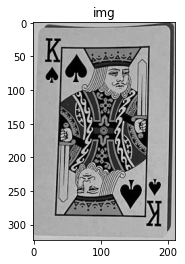

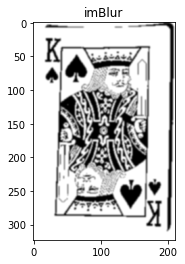

In [14]:
import pytesseract

def GetLetter(img):
    #Gets a threshold
    thresh = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    print("The card is: ",textFromImage)
    
    plt.imshow(img, cmap='gray')
    plt.title('img')
    plt.show()
    plt.imshow(imBlur, cmap='gray')
    plt.title('imBlur')
    plt.show()
    
    
    
#Path to your Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

#Imput takes small section of top corner of card
image = cv2.imread('singleCard.jpg',0)
GetLetter(image)


In [13]:
#Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
import pytesseract


def GetLetter(croppedLetter):
    print("GetLetter ")
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    p1 = fig.add_subplot(2, 5, 3)
    imgplot = plt.imshow(imBlur, cmap='gray')
        
    
    return cardType

def suitComparison(club, diamond, heart, spade, inputTestImage):
    print("suitComparison ")
    # Variables for comparison
    best_rank_match_diff = 1000000000
    match = "none"
    
    # Performs comparison with heart.
    height, width, _ = heart.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, heart)
    rank_diff = int(np.sum(diff_img)/255)               
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "heart"


    # Performs comparison with spade.
    height, width, _ = spade.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, spade)
    rank_diff = int(np.sum(diff_img)/255)           
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "spade"


    # Performs comparison with club.
    height, width, _ = club.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, club)
    rank_diff = int(np.sum(diff_img)/255)             
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "club"


    # Performs comparison with diamond.
    height, width, _ = diamond.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, diamond)
    rank_diff = int(np.sum(diff_img)/255)      
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "diamond"


    p1 = fig.add_subplot(2, 5, 4)
    imgplot = plt.imshow(inputTestImage, cmap='gray')
    
    # Prints the match with the lowest absdiff
    return match

def ReadCard(img):
    G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    T = 120
    T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

    #inverse = cv2.bitwise_not(B)
    C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    C = sorted(C, key=cv2.contourArea, reverse=True)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    i = 0

    while i < 5:
        print("card : ",i)
        fig = plt.figure()#make a figure to show things on

        largestContour = C[i]
        x,y,w,h = cv2.boundingRect(largestContour)

        ROI = img[y:y+h,x:x+w]
        H,W,Channels = ROI.shape

        cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
        cropped_symbol = ROI[50:int(H * 0.3), 3:int(W * 0.2)]

        cardLetter = GetLetter(cropped_letter)

        # Reading in suit templates
        club = cv2.imread("clubs.png")
        diamond = cv2.imread("diamonds.png")
        heart = cv2.imread("hearts.png")
        spade = cv2.imread("spades.png")
        # Reading in template
        inputTestImage = cv2.imread("testSuit.jpg")

        bestMatch = suitComparison(club, diamond, heart, spade, cropped_symbol)
        print("The most likely suit match is:", bestMatch)

        print("The card is: ",cardLetter)

        p1 = fig.add_subplot(2, 5, 1)#nrows, ncols, index#span with (3, 1, (1, 2))
        imgplot = plt.imshow(ROI, cmap='gray')
        p1 = fig.add_subplot(2, 5, 2)
        imgplot = plt.imshow(cropped_letter, cmap='gray')
        #p1 = fig.add_subplot(2, 5, 5)
        #imgplot = plt.imshow(cropped_letter, cmap='gray')
        plt.show()

        i = i + 1





cap = cv2.VideoCapture(0)

cvtFrame = cv2.imread('blackCard1.jpg',0)
ReadCard(cvtFrame)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    
    if c == 32:#IF keycode space
        print("running")
        cvtFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #ReadCard(cvtFrame)

        plt.imshow(cvtFrame, cmap='gray')
        plt.title('cvtFrame')
        plt.show()
        break
        
    if c == 27:#IF keycode esc
        print("esc")
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.4.0) c:\users\appveyor\appdata\local\temp\1\pip-req-build-wwma2wne\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x389cd1fc::Set<1,-1,-1>,struct cv::impl::A0x389cd1fc::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


card :  0
GetLetter 
suitComparison 
The most likely suit match is: club
The card is:  Ace


<ipython-input-20-35ee54c64f6b>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  p1 = fig.add_subplot(2, 5, 3)
<ipython-input-20-35ee54c64f6b>:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  p1 = fig.add_subplot(2, 5, 4)


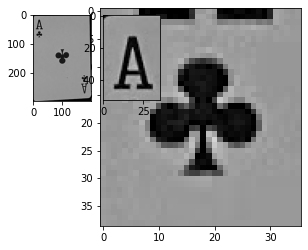

card :  1
GetLetter 
suitComparison 
The most likely suit match is: heart
The card is:  8


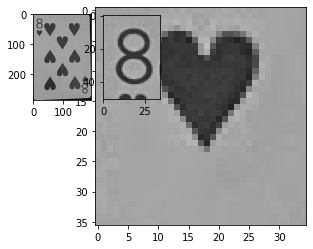

card :  2
GetLetter 
suitComparison 
The most likely suit match is: diamond
The card is:  2


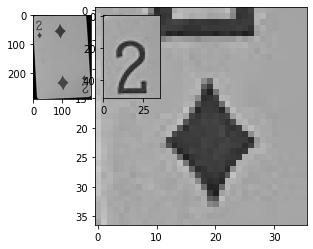

card :  3
GetLetter 
suitComparison 
The most likely suit match is: spade
The card is:  King


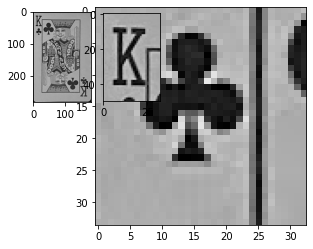

card :  4
GetLetter 
suitComparison 
The most likely suit match is: spade
The card is:  6


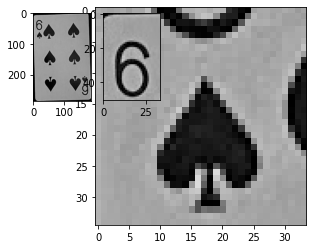

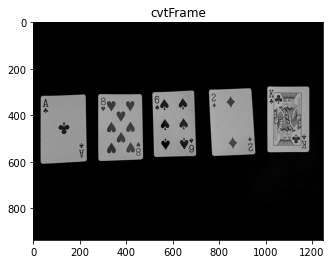

In [20]:
#Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
import pytesseract


def GetLetter(croppedLetter):
    print("GetLetter ")
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    p1 = fig.add_subplot(2, 5, 3)
    imgplot = plt.imshow(imBlur, cmap='gray')
        
    
    return cardType

def suitComparison(club, diamond, heart, spade, inputTestImage):
    print("suitComparison ")
    # Variables for comparison
    best_rank_match_diff = 1000000000
    match = "none"
    
    # Performs comparison with heart.
    height, width, _ = heart.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, heart)
    rank_diff = int(np.sum(diff_img)/255)               
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "heart"


    # Performs comparison with spade.
    height, width, _ = spade.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, spade)
    rank_diff = int(np.sum(diff_img)/255)           
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "spade"


    # Performs comparison with club.
    height, width, _ = club.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, club)
    rank_diff = int(np.sum(diff_img)/255)             
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "club"


    # Performs comparison with diamond.
    height, width, _ = diamond.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, diamond)
    rank_diff = int(np.sum(diff_img)/255)      
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "diamond"


    p1 = fig.add_subplot(2, 5, 4)
    imgplot = plt.imshow(inputTestImage, cmap='gray')
    
    # Prints the match with the lowest absdiff
    return match

def ReadCard(img):
    G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    T = 120
    T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

    C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    C = sorted(C, key=cv2.contourArea, reverse=True)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    i = 0

    while i < 5:
        print("card : ",i)
        fig = plt.figure()#make a figure to show things on

        largestContour = C[i]
        x,y,w,h = cv2.boundingRect(largestContour)

        ROI = img[y:y+h,x:x+w]
        H,W,Channels = ROI.shape

        cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
        cropped_symbol = ROI[50:int(H * 0.3), 3:int(W * 0.2)]

        cardLetter = GetLetter(cropped_letter)

        # Reading in suit templates
        club = cv2.imread("clubs.png")
        diamond = cv2.imread("diamonds.png")
        heart = cv2.imread("hearts.png")
        spade = cv2.imread("spades.png")
        # Reading in template
        inputTestImage = cv2.imread("testSuit.jpg")

        bestMatch = suitComparison(club, diamond, heart, spade, cropped_symbol)
        print("The most likely suit match is:", bestMatch)

        print("The card is: ",cardLetter)

        p1 = fig.add_subplot(2, 5, 1)#nrows, ncols, index#span with (3, 1, (1, 2))
        imgplot = plt.imshow(ROI, cmap='gray')
        p1 = fig.add_subplot(2, 5, 2)
        imgplot = plt.imshow(cropped_letter, cmap='gray')
        #p1 = fig.add_subplot(2, 5, 5)
        #imgplot = plt.imshow(cropped_letter, cmap='gray')
        plt.show()

        i = i + 1





#cap = cv2.VideoCapture(0)

frame = cv2.imread('blackCard1.jpg',0)
cvtFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
ReadCard(cvtFrame)

plt.imshow(cvtFrame, cmap='gray')
plt.title('cvtFrame')
plt.show()
#ReadCard(cvtFrame)

cv2.destroyAllWindows()

In [1]:
#Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
import pytesseract

def GetLetter(croppedLetter,fig):
    print("GetLetter")
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    p1 = fig.add_subplot(2, 5, 3)
    imgplot = plt.imshow(imBlur, cmap='gray')
        
    
    return cardType

def suitComparison(club, diamond, heart, spade, inputTestImage,fig):
    print("suitComparison")
    # Variables for comparison
    best_rank_match_diff = 1000000000
    match = "none"
    
    # Performs comparison with heart.
    height, width, _ = heart.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, heart)
    rank_diff = int(np.sum(diff_img)/255)               
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "heart"


    # Performs comparison with spade.
    height, width, _ = spade.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, spade)
    rank_diff = int(np.sum(diff_img)/255)           
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "spade"


    # Performs comparison with club.
    height, width, _ = club.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, club)
    rank_diff = int(np.sum(diff_img)/255)             
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "club"


    # Performs comparison with diamond.
    height, width, _ = diamond.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    diff_img = cv2.absdiff(testImage, diamond)
    rank_diff = int(np.sum(diff_img)/255)      
    if rank_diff < best_rank_match_diff:
        best_rank_match_diff = rank_diff
        match = "diamond"


    p1 = fig.add_subplot(2, 5, 4)
    imgplot = plt.imshow(inputTestImage, cmap='gray')
    
    # Prints the match with the lowest absdiff
    return match

def ReadCard(img):
    print("ReadCard")
    G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    T = 120
    T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

    #inverse = cv2.bitwise_not(B)
    C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    C = sorted(C, key=cv2.contourArea, reverse=True)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    i = 0

    while i < 5:
        fig = plt.figure()#make a figure to show things on

        largestContour = C[i]
        x,y,w,h = cv2.boundingRect(largestContour)

        ROI = img[y:y+h,x:x+w]
        H,W,Channels = ROI.shape

        cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
        cropped_symbol = ROI[50:int(H * 0.3), 3:int(W * 0.2)]

        cardLetter = GetLetter(cropped_letter,fig )

        # Reading in suit templates
        club = cv2.imread("clubs.png")
        diamond = cv2.imread("diamonds.png")
        heart = cv2.imread("hearts.png")
        spade = cv2.imread("spades.png")
        # Reading in template
        inputTestImage = cv2.imread("testSuit.jpg")

        bestMatch = suitComparison(club, diamond, heart, spade, cropped_symbol,fig)
        print("The most likely suit match is:", bestMatch)

        print("The card is: ",cardLetter)

        p1 = fig.add_subplot(2, 5, 1)#nrows, ncols, index#span with (3, 1, (1, 2))
        imgplot = plt.imshow(ROI, cmap='gray')
        p1 = fig.add_subplot(2, 5, 2)
        imgplot = plt.imshow(cropped_letter, cmap='gray')
        p1 = fig.add_subplot(2, 5, 5)#nrows, ncols, index#span with (3, 1, (1, 2))
        imgplot = plt.imshow(img, cmap='gray')
        #p1 = fig.add_subplot(2, 5, 5)
        #imgplot = plt.imshow(cropped_letter, cmap='gray')
        plt.show()

        i = i + 1



print("t")
f = cv2.imread('blackCard1.jpg',0)
cvtFrame = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
ReadCard(cvtFrame)

cap.release()
cv2.destroyAllWindows()



t
ReadCard
GetLetter


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

<Figure size 432x288 with 0 Axes>

In [8]:
import Image
from tesseract import image_to_string

print(image_to_string(Image.open('test.png')))

ModuleNotFoundError: No module named 'Image'

In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

ImgLetter = cv2.imread("sampleLetter3.png")
ImgText = cv2.imread("sampleText.png")

#ImgLetterB = cv2.cvtColor(ImgLetter, cv2.COLOR_BGR2GRAY)



print(pytesseract.image_to_string(ImgLetter))
print(pytesseract.image_to_string(ImgText))

TypeError: Unsupported image object

In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

ImgLetter = cv2.imread("sampleLetter3.png")
ImgText = cv2.imread("sampleText.png")

#ImgLetterB = cv2.cvtColor(ImgLetter, cv2.COLOR_BGR2GRAY)



print(pytesseract.image_to_string(ImgLetter))
print(pytesseract.image_to_string(ImgText))

TypeError: Unsupported image object

In [7]:
import pytesseract

def GetLetter(img):
    #Gets a threshold
    thresh = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
    print("The card is: ",textFromImage)
    
    plt.imshow(img, cmap='gray')
    plt.title('img')
    plt.show()
    plt.imshow(imBlur, cmap='gray')
    plt.title('imBlur')
    plt.show()
    
    
    
#Path to your Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

#Imput takes small section of top corner of card
image = cv2.imread('2Test.jpg',0)
GetLetter(image)
image = cv2.imread('6Test.jpg',0)
GetLetter(image)
image = cv2.imread('8Test.jpg',0)
GetLetter(image)
image = cv2.imread('ATest.jpg',0)
GetLetter(image)
#image = cv2.imread('sampleLetter.png',0)
#GetLetter(image)

    

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-wwma2wne\opencv\modules\imgproc\src\smooth.dispatch.cpp:620: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'
